In [5]:
# data manipulation
import pandas as pd
import numpy as np

# pre processing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# pre processing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# plotting
import matplotlib.pyplot as plt

# saving
import joblib

In [6]:
X_train = joblib.load('data/X_train_preprocessed.pkl')
X_test = joblib.load('data/X_test_preprocessed.pkl')
y_train = joblib.load('data/y_train_preprocessed.pkl')
y_test = joblib.load('data/y_test_preprocessed.pkl')

In [7]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

In [8]:
mlp = MLPClassifier(max_iter=1000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [9]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [10]:
def train_random_search(X, y, estimator, grid):
    random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=grid,
        cv=skf,
        scoring=scoring,
        refit='f1_macro',
        n_jobs=-1,
        return_train_score=True,
        verbose=1,
        n_iter=100
    )

    random_search.fit(X, y)

    return random_search

In [11]:
def get_results(g_search):
    results = pd.DataFrame(g_search.cv_results_)
    
    results = results[
        [
            'mean_fit_time', 'mean_score_time', 'param_hidden_layer_sizes', 'param_activation', 'param_solver',
            'param_alpha', 'param_learning_rate', 'param_learning_rate_init', 'mean_train_accuracy', 'mean_test_accuracy', 'rank_test_accuracy', 'mean_train_precision_macro', 
            'mean_test_precision_macro', 'rank_test_precision_macro', 'mean_train_recall_macro', 'mean_test_recall_macro', 
            'rank_test_recall_macro', 'mean_train_f1_macro', 'mean_test_f1_macro', 'rank_test_f1_macro'
        ]
    ]

    results = results.sort_values(by='mean_test_f1_macro', ascending=False)
    return results

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
random_search = train_random_search(X_train, y_train, mlp, param_grid)
results = get_results(random_search)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [14]:
results.head(200)

,mean_fit_time,mean_score_time,param_hidden_layer_sizes,param_activation,param_solver,param_alpha,param_learning_rate,param_learning_rate_init,mean_train_accuracy,mean_test_accuracy,rank_test_accuracy,mean_train_precision_macro,mean_test_precision_macro,rank_test_precision_macro,mean_train_recall_macro,mean_test_recall_macro,rank_test_recall_macro,mean_train_f1_macro,mean_test_f1_macro,rank_test_f1_macro
79,21.323738,0.020734,"(100,)",logistic,adam,0.01,invscaling,0.01,0.963335,0.840894,27,0.932916,0.714885,22,0.923756,0.699576,4,0.924853,0.702725,1
5,84.043785,0.025085,"(100, 50)",tanh,sgd,0.001,constant,0.001,0.891106,0.860678,1,0.829274,0.756239,1,0.736434,0.677618,32,0.769509,0.702691,2
66,61.413352,0.022181,"(100,)",relu,sgd,0.0001,adaptive,0.01,0.999754,0.844987,22,0.999530,0.716828,20,0.999575,0.691564,9,0.999552,0.701652,3
9,21.763432,0.021355,"(50, 50)",tanh,sgd,0.001,constant,0.01,0.955339,0.838168,37,0.925230,0.707631,27,0.918874,0.700282,3,0.918830,0.701567,4
48,69.244116,0.027985,"(100, 50)",logistic,adam,0.01,constant,0.001,0.912442,0.856074,2,0.870847,0.747064,6,0.785524,0.682387,22,0.812183,0.701398,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,3.310883,0.023989,"(50, 50)",logistic,sgd,0.0001,invscaling,0.001,0.835266,0.835266,50,0.417633,0.417633,85,0.500000,0.500000,85,0.455120,0.455120,84
52,2.463552,0.018429,"(100,)",relu,sgd,0.01,invscaling,0.01,0.835380,0.835266,50,0.455200,0.417633,85,0.500484,0.500000,85,0.456167,0.455120,84
56,2.001288,0.025928,"(50, 50)",logistic,sgd,0.001,constant,0.001,0.835266,0.835266,50,0.417633,0.417633,85,0.500000,0.500000,85,0.455120,0.455120,84
99,3.046279,0.028103,"(100,)",tanh,sgd,0.001,invscaling,0.01,0.835285,0.835266,50,0.517647,0.417633,85,0.500104,0.500000,85,0.455353,0.455120,84


In [15]:
def view_test_metrics(train_metrics: bool, filter_top_n: int, results_df: pd.DataFrame):
    if train_metrics:
        metrics = [
            "mean_train_accuracy", "mean_test_accuracy",
            "mean_train_precision_macro", "mean_test_precision_macro",
            "mean_train_recall_macro", "mean_test_recall_macro",
            "mean_train_f1_macro", "mean_test_f1_macro"
        ]
    else:
        metrics = [
            "mean_test_accuracy",
            "mean_test_precision_macro",
            "mean_test_recall_macro",
            "mean_test_f1_macro"
        ]

    if filter_top_n:
        results_df = results_df.nsmallest(filter_top_n, "rank_test_f1_macro")

    param_cols = ['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate', 'param_learning_rate_init']
    plot_df = results_df.melt(
        id_vars=param_cols,      # keep these columns "as is"
        value_vars=metrics,      # the columns we want to "unpivot"
        var_name="metric",       # new column with the metric name
        value_name="score"       # new column with the metric value
    )

    plt.figure(figsize=(12, 8))


    for combo, group in plot_df.groupby(param_cols):
        # Sort the group by metric name (if desired)
        group = group.sort_values("metric")
        # Create a label for this parameter combination
        label_str = ", ".join(f"{col}={val}" for col, val in zip(param_cols, combo))
        
        # Separate train and test metrics using .str.startswith on the 'metric' column
        train_group = group[group["metric"].str.startswith("mean_train")]
        test_group = group[~group["metric"].str.startswith("mean_train")]

        # Plot training metrics with a dashed line and an 'x' marker (with transparency)
        if not train_group.empty:
            plt.plot(train_group["metric"], train_group["score"], 
                     marker='x', linestyle='dashed', alpha=0.7,
                     label=label_str + " (train)")
        # Plot test metrics with a solid line and an 'o' marker (with transparency)
        if not test_group.empty:
            plt.plot(test_group["metric"], test_group["score"], 
                     marker='o', linestyle='solid', alpha=0.7,
                     label=label_str + " (test)")

    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.title("Comparison of Mean Test Metrics")
    plt.xticks(rotation=45)
    # Adjust the legend to avoid cluttering the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()  

C:\Users\caiop\AppData\Local\Temp\ipykernel_5556\475445105.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


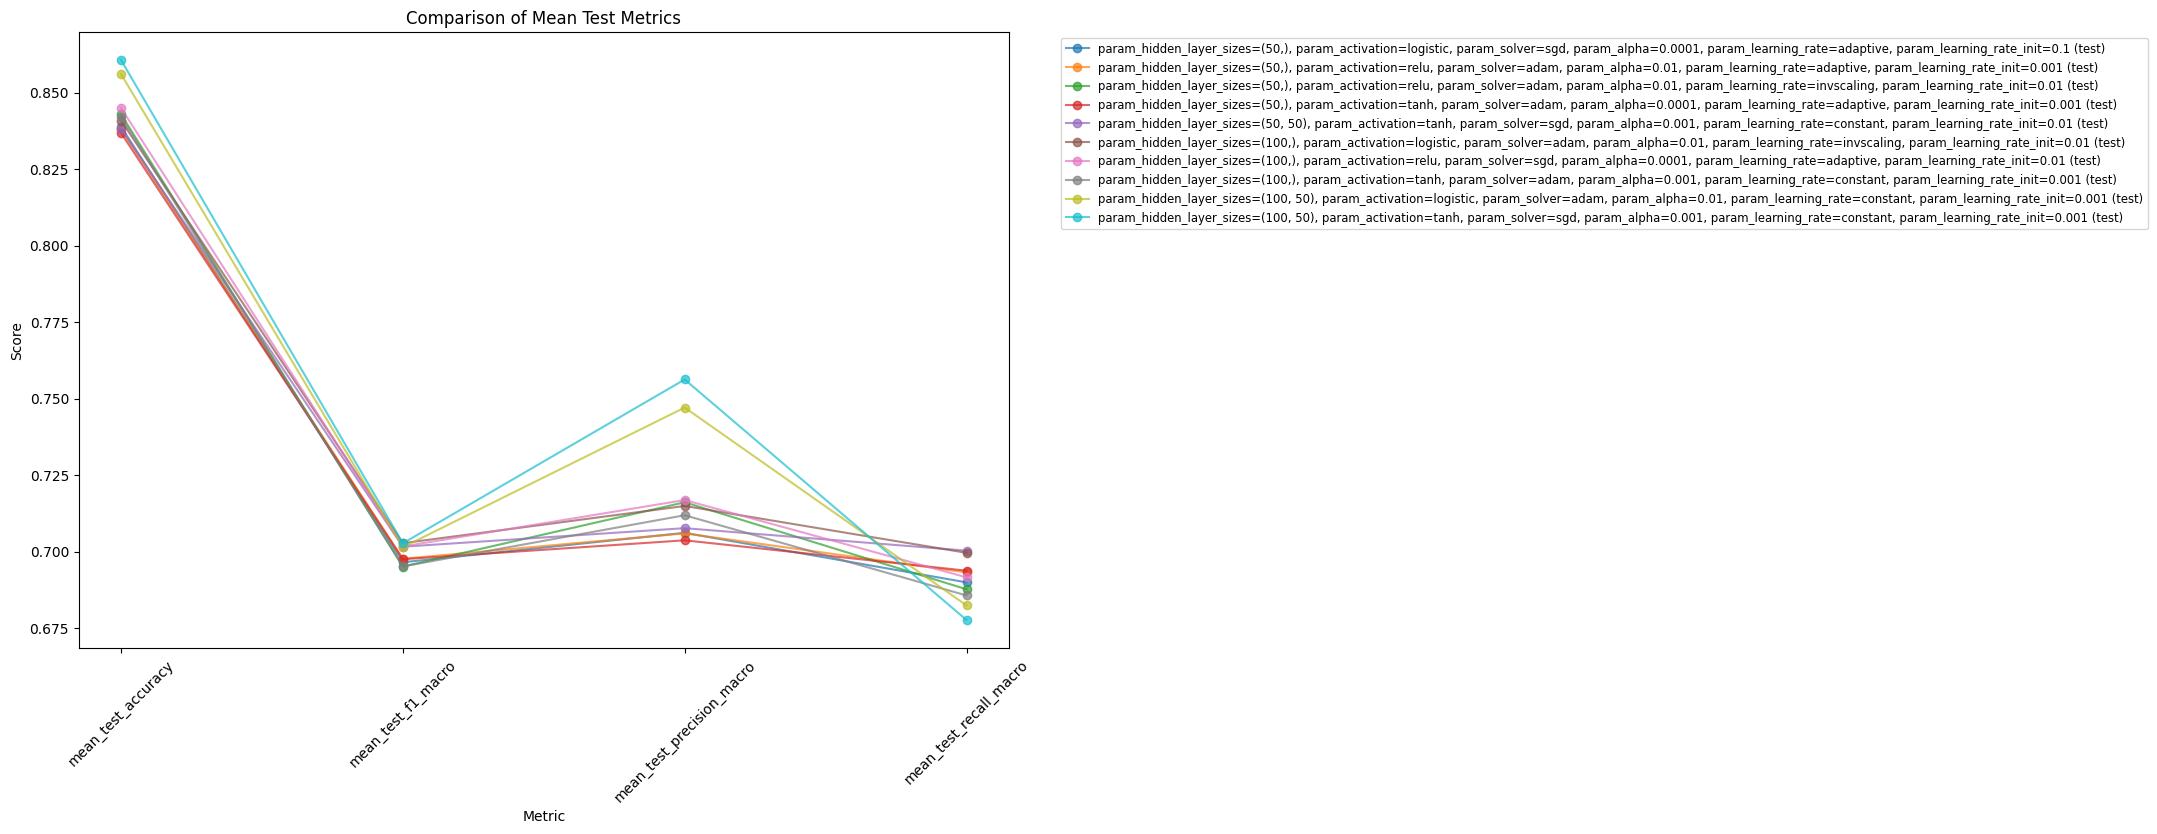

In [16]:
view_test_metrics(False, 10, results)

Como os modelos ficaram com recall e, consequentemente, f1-score baixo, isso indica que o modelo provavelmente está com bom desempenho para a classe dominante (ja que a acurácia está boa), mas não para a outra. Isso pode acontecer por conta do desbalanceamento entre as classes, então podemos tentar aplicar técnicas de balanceamento.

In [17]:
def os_smote(X, y):
    # auto faz resampling de todas as classes, menos a minoritária
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    
    return X_balanced, y_balanced

In [18]:
pipeline = Pipeline([
    ('oversampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('mlp', MLPClassifier())
])

In [19]:
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1]
}

In [20]:
def get_results_pipeline(g_search):
    results = pd.DataFrame(g_search.cv_results_)
    
    results = results[
        [
            'mean_fit_time', 'mean_score_time', 'param_mlp__hidden_layer_sizes', 'param_mlp__activation', 'param_mlp__solver',
            'param_mlp__alpha', 'param_mlp__learning_rate', 'param_mlp__learning_rate_init', 'mean_train_accuracy', 'mean_test_accuracy', 'rank_test_accuracy', 'mean_train_precision_macro', 
            'mean_test_precision_macro', 'rank_test_precision_macro', 'mean_train_recall_macro', 'mean_test_recall_macro', 
            'rank_test_recall_macro', 'mean_train_f1_macro', 'mean_test_f1_macro', 'rank_test_f1_macro'
        ]
    ]

    results = results.sort_values(by='mean_test_f1_macro', ascending=False)
    return results

In [21]:
def view_test_metrics_pipeline(train_metrics: bool, filter_top_n: int, results_df: pd.DataFrame):
    if train_metrics:
        metrics = [
            "mean_train_accuracy", "mean_test_accuracy",
            "mean_train_precision_macro", "mean_test_precision_macro",
            "mean_train_recall_macro", "mean_test_recall_macro",
            "mean_train_f1_macro", "mean_test_f1_macro"
        ]
    else:
        metrics = [
            "mean_test_accuracy",
            "mean_test_precision_macro",
            "mean_test_recall_macro",
            "mean_test_f1_macro"
        ]

    if filter_top_n:
        results_df = results_df.nsmallest(filter_top_n, "rank_test_f1_macro")

    param_cols = ['param_mlp__hidden_layer_sizes', 'param_mlp__activation', 'param_mlp__solver', 'param_mlp__alpha', 'param_mlp__learning_rate', 'param_mlp__learning_rate_init']
    plot_df = results_df.melt(
        id_vars=param_cols,      # keep these columns "as is"
        value_vars=metrics,      # the columns we want to "unpivot"
        var_name="metric",       # new column with the metric name
        value_name="score"       # new column with the metric value
    )

    plt.figure(figsize=(12, 8))


    for combo, group in plot_df.groupby(param_cols):
        # Sort the group by metric name (if desired)
        group = group.sort_values("metric")
        # Create a label for this parameter combination
        label_str = ", ".join(f"{col}={val}" for col, val in zip(param_cols, combo))
        
        # Separate train and test metrics using .str.startswith on the 'metric' column
        train_group = group[group["metric"].str.startswith("mean_train")]
        test_group = group[~group["metric"].str.startswith("mean_train")]

        # Plot training metrics with a dashed line and an 'x' marker (with transparency)
        if not train_group.empty:
            plt.plot(train_group["metric"], train_group["score"], 
                     marker='x', linestyle='dashed', alpha=0.7,
                     label=label_str + " (train)")
        # Plot test metrics with a solid line and an 'o' marker (with transparency)
        if not test_group.empty:
            plt.plot(test_group["metric"], test_group["score"], 
                     marker='o', linestyle='solid', alpha=0.7,
                     label=label_str + " (test)")

    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.title("Comparison of Mean Test Metrics")
    plt.xticks(rotation=45)
    # Adjust the legend to avoid cluttering the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()  

In [22]:
def train_random_search_pipeline(X, y, estimator, grid):
    random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=grid,
        cv=skf,
        scoring=scoring,
        refit='f1_macro',
        n_jobs=-1,
        return_train_score=True,
        n_iter=20, 
        verbose=1,
    )

    random_search.fit(X, y)

    return random_search

In [23]:
random_search_pipeline = train_random_search_pipeline(X_train, y_train, pipeline, param_grid)
results_pipeline = get_results_pipeline(random_search_pipeline)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [24]:
results_pipeline.head(10)

,mean_fit_time,mean_score_time,param_mlp__hidden_layer_sizes,param_mlp__activation,param_mlp__solver,param_mlp__alpha,param_mlp__learning_rate,param_mlp__learning_rate_init,mean_train_accuracy,mean_test_accuracy,rank_test_accuracy,mean_train_precision_macro,mean_test_precision_macro,rank_test_precision_macro,mean_train_recall_macro,mean_test_recall_macro,rank_test_recall_macro,mean_train_f1_macro,mean_test_f1_macro,rank_test_f1_macro
5,30.137853,0.018012,"(100,)",logistic,adam,0.01,invscaling,0.01,0.970859,0.817183,7,0.934787,0.687638,6,0.979923,0.720307,8,0.952776,0.696935,1
11,19.757069,0.020766,"(100,)",relu,sgd,0.0001,adaptive,0.1,0.964568,0.818562,6,0.920814,0.686895,7,0.972237,0.715694,10,0.942055,0.696576,2
12,39.849726,0.021927,"(100, 50)",tanh,adam,0.0001,invscaling,0.001,0.999886,0.835440,1,0.999794,0.703666,2,0.999793,0.691709,13,0.999793,0.694825,3
0,24.732819,0.029560,"(100,)",logistic,adam,0.001,adaptive,0.01,0.997802,0.826232,4,0.993742,0.689657,5,0.998546,0.700247,12,0.996075,0.693228,4
7,30.811974,0.027579,"(100,)",logistic,adam,0.0001,constant,0.001,0.820999,0.773368,9,0.724978,0.673669,9,0.845708,0.770833,1,0.751160,0.689199,5
6,15.164267,0.019913,"(100, 50)",tanh,adam,0.001,constant,0.01,0.971427,0.833056,2,0.948027,0.701765,3,0.951408,0.672796,17,0.947492,0.678385,6
4,32.043016,0.017839,"(100, 50)",tanh,sgd,0.0001,adaptive,0.01,0.973168,0.832707,3,0.964549,0.712277,1,0.943660,0.685943,15,0.932064,0.678125,7
19,16.888618,0.011121,"(100,)",relu,sgd,0.0001,adaptive,0.01,0.938417,0.819420,5,0.903988,0.692669,4,0.919343,0.685952,14,0.895119,0.672935,8
8,44.259842,0.023536,"(100, 50)",logistic,sgd,0.001,constant,0.01,0.768606,0.751892,10,0.682519,0.666560,10,0.792193,0.765791,4,0.693742,0.672586,9
14,9.978491,0.020548,"(100,)",relu,sgd,0.001,invscaling,0.1,0.753676,0.746937,12,0.669455,0.661974,13,0.780986,0.767492,3,0.678756,0.669636,10


C:\Users\caiop\AppData\Local\Temp\ipykernel_5556\1441396768.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


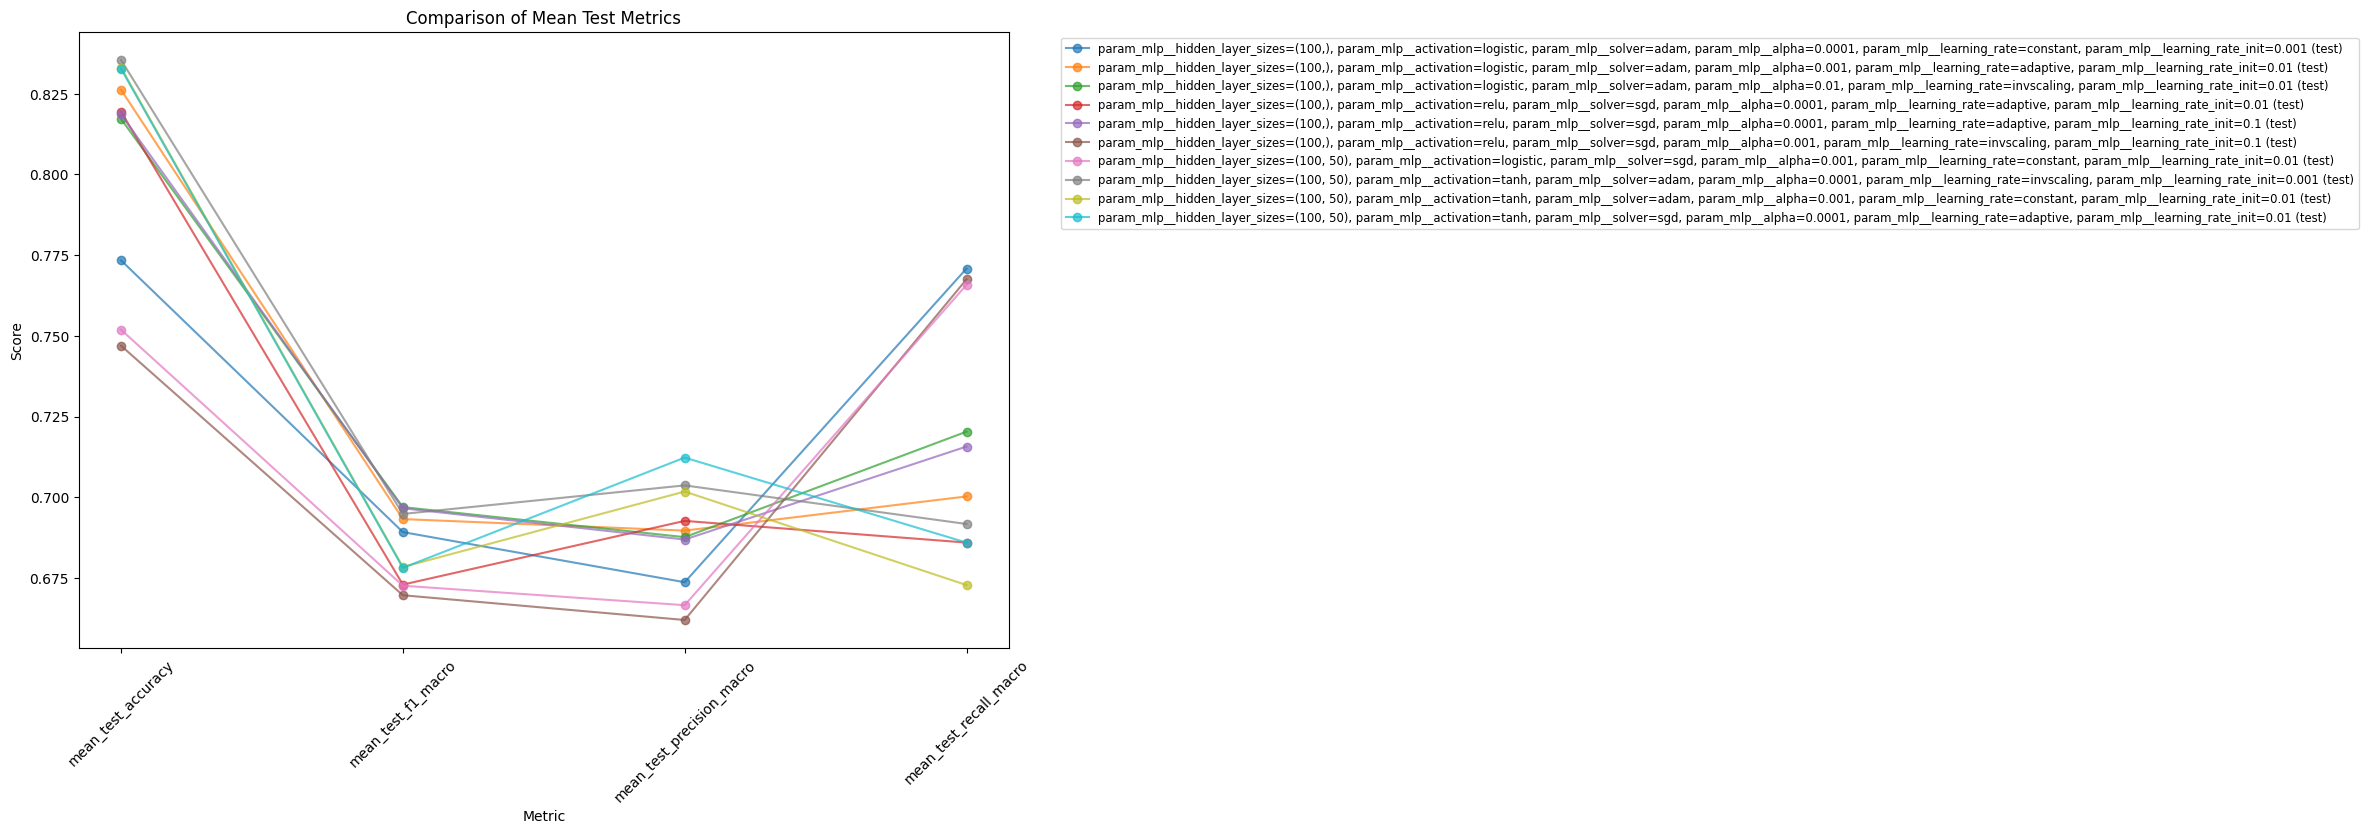

In [25]:
view_test_metrics_pipeline(False, 10, results_pipeline)

In [26]:
pipeline_SMOTE = Pipeline([
    ('oversampler', SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)),
    ('mlp', MLPClassifier())
])

In [27]:
random_search_pipeline_SMOTE = train_random_search_pipeline(X_train, y_train, pipeline_SMOTE, param_grid)
results_pipeline_SMOTE = get_results_pipeline(random_search_pipeline_SMOTE)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
results_pipeline_SMOTE.head(10)

,mean_fit_time,mean_score_time,param_mlp__hidden_layer_sizes,param_mlp__activation,param_mlp__solver,param_mlp__alpha,param_mlp__learning_rate,param_mlp__learning_rate_init,mean_train_accuracy,mean_test_accuracy,rank_test_accuracy,mean_train_precision_macro,mean_test_precision_macro,rank_test_precision_macro,mean_train_recall_macro,mean_test_recall_macro,rank_test_recall_macro,mean_train_f1_macro,mean_test_f1_macro,rank_test_f1_macro
12,17.587830,0.025738,"(50,)",tanh,adam,0.001,constant,0.001,0.943800,0.833568,2,0.880838,0.709767,2,0.940178,0.737932,2,0.905898,0.719942,1
10,28.036104,0.028476,"(100,)",tanh,adam,0.001,constant,0.001,0.960475,0.835098,1,0.911972,0.708846,3,0.958519,0.730512,5,0.932479,0.717093,2
18,26.534557,0.013135,"(100,)",tanh,sgd,0.001,constant,0.01,0.928433,0.832547,4,0.870813,0.715494,1,0.898710,0.723176,7,0.876889,0.709763,3
8,23.437796,0.020996,"(100,)",relu,sgd,0.0001,adaptive,0.01,0.966916,0.832712,3,0.933912,0.702421,4,0.958910,0.707899,10,0.942573,0.699804,4
3,33.897011,0.025432,"(100, 50)",tanh,sgd,0.01,constant,0.01,0.956799,0.819234,9,0.914442,0.687664,7,0.948280,0.708162,9,0.924298,0.692381,5
4,37.795014,0.024700,"(100, 50)",logistic,adam,0.01,adaptive,0.01,0.975083,0.826732,7,0.956354,0.692500,5,0.961066,0.694030,11,0.953936,0.688709,6
13,19.456948,0.023972,"(50, 50)",relu,sgd,0.001,adaptive,0.1,0.887997,0.793152,13,0.796760,0.669436,14,0.890984,0.729839,6,0.828871,0.685935,7
0,25.023319,0.033611,"(100,)",tanh,sgd,0.01,adaptive,0.001,0.782647,0.769450,14,0.684747,0.670035,12,0.790389,0.765983,1,0.702781,0.684543,8
6,21.271390,0.025194,"(50,)",logistic,adam,0.0001,constant,0.01,0.998750,0.826918,6,0.997839,0.685531,9,0.997637,0.680347,13,0.997715,0.681468,9
11,14.077036,0.019072,"(50,)",tanh,adam,0.001,constant,0.01,0.993975,0.828283,5,0.993388,0.688119,6,0.984765,0.674830,15,0.988497,0.679033,10


C:\Users\caiop\AppData\Local\Temp\ipykernel_5556\1441396768.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


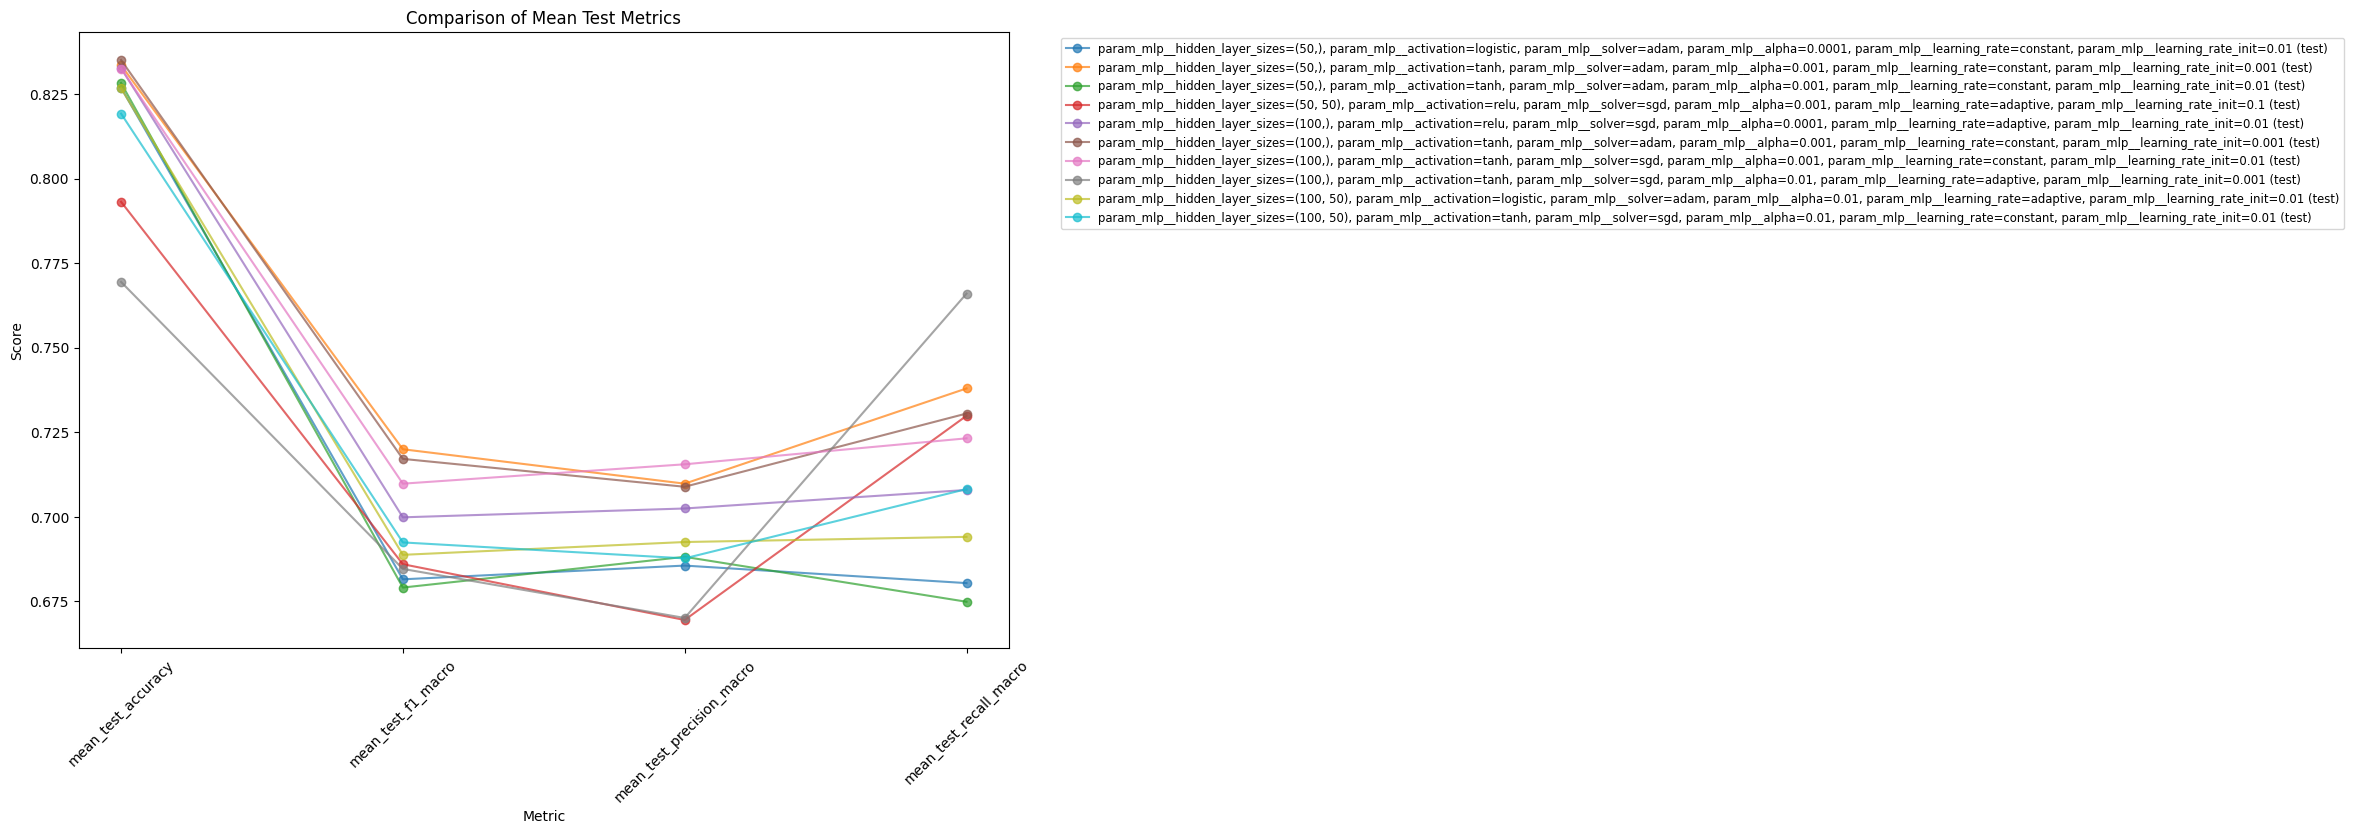

In [29]:
view_test_metrics_pipeline(False, 10, results_pipeline_SMOTE)

In [30]:
preds = cross_val_predict(random_search_pipeline_SMOTE.best_estimator_, X_train, y_train, cv=skf, n_jobs=-1)

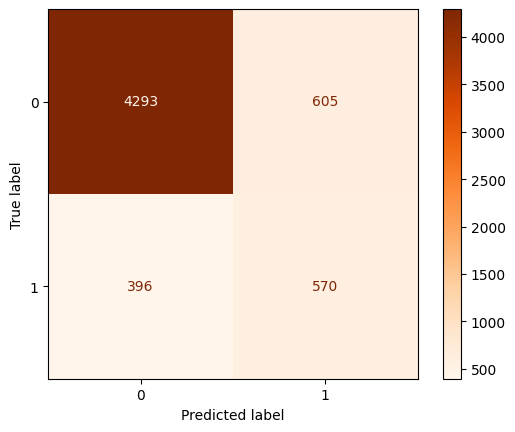

In [31]:
cm = confusion_matrix(y_train, preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=random_search_pipeline_SMOTE.best_estimator_.classes_)
cmd.plot(cmap=plt.cm.Oranges)
plt.show()

In [32]:
print(classification_report(y_train, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9155    0.8765    0.8956      4898
           1     0.4851    0.5901    0.5325       966

    accuracy                         0.8293      5864
   macro avg     0.7003    0.7333    0.7140      5864
weighted avg     0.8446    0.8293    0.8358      5864



In [33]:
joblib.dump(random_search_pipeline_SMOTE.best_estimator_, 'models/mlp.pkl')

['models/mlp.pkl']

In [35]:
col_names = list(joblib.load('data/col_names.pkl'))

In [38]:
mlp = joblib.load('models/mlp.pkl')

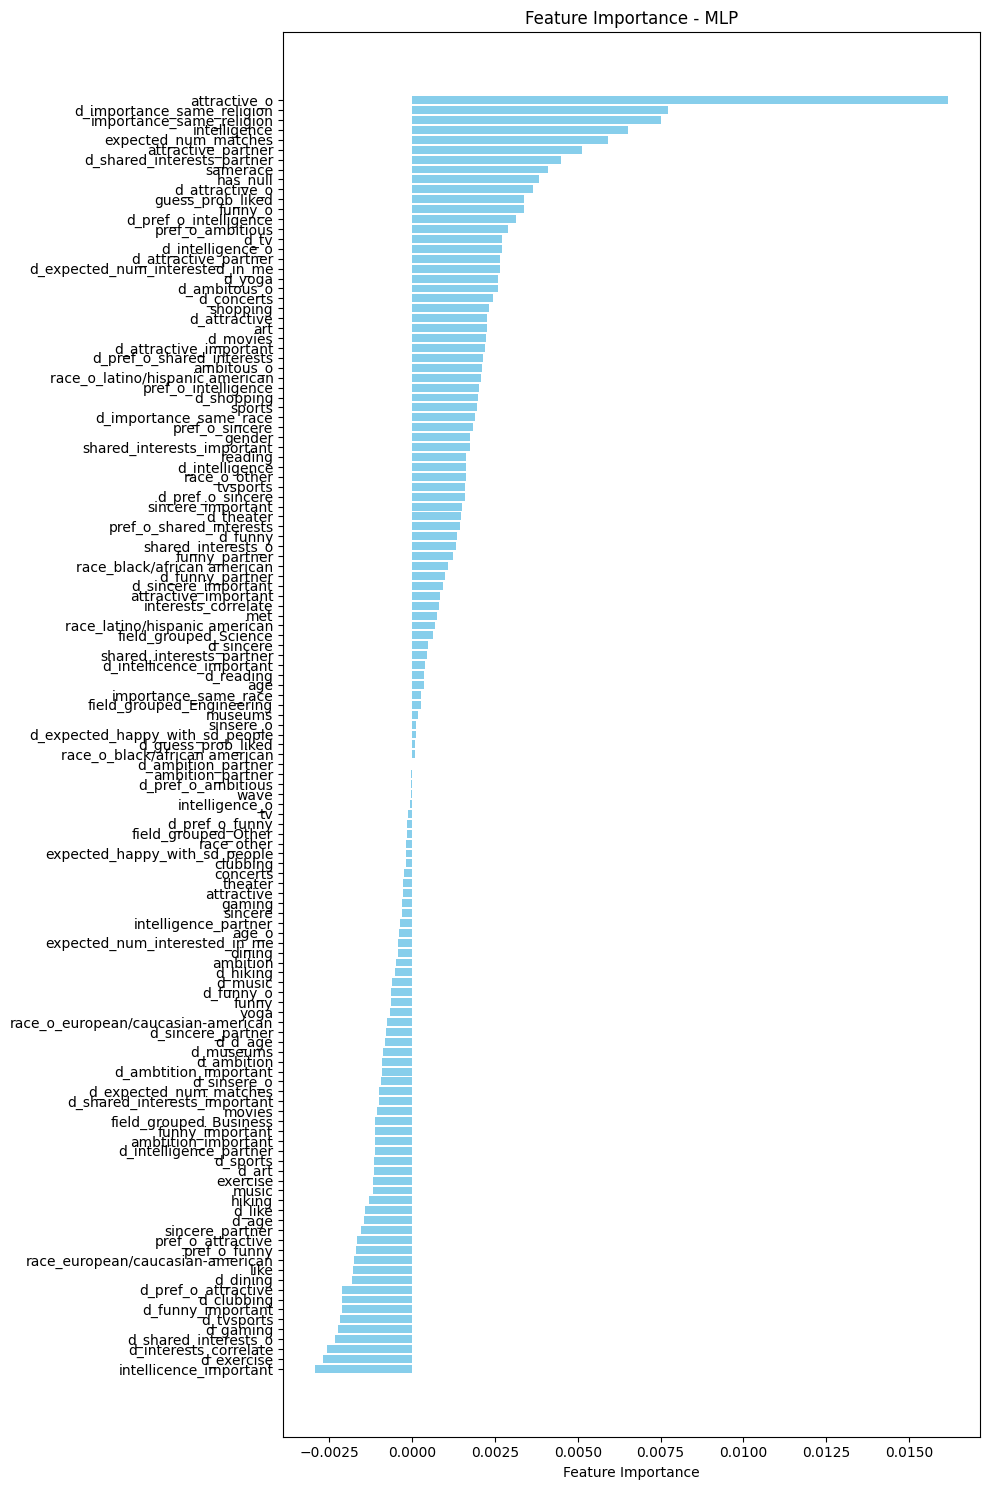

In [ ]:
from sklearn.inspection import permutation_importance

result_mlp = permutation_importance(
    estimator=mlp,       
    X=X_test,
    y=y_test,
    n_repeats=10,
    random_state=42
)

mlp_importances = result_mlp.importances_mean

feature_importance_mlp = pd.DataFrame(
    data=[mlp_importances],
    columns=col_names
)

importance_series_mlp = feature_importance_mlp.iloc[0]

importance_series_sorted_mlp = importance_series_mlp.sort_values(ascending=True)

plt.figure(figsize=(10, 15))
plt.barh(importance_series_sorted_mlp.index, importance_series_sorted_mlp.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - MLP')
plt.tight_layout()
plt.show()